<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGIT_Mod_3_Pandas_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Movie Dataset

https://www.kaggle.com/rounakbanik/the-movies-dataset

The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.


The dataset has the following features:

budget - The budget in which the movie was made.<br>

*   **genre** - The genre of the movie, Action, Comedy ,Thriller etc.
*   **homepage** - A link to the homepage of the movie.
*   **id** - This is infact the movie_id as in the first dataset.
*   **keywords** - The keywords or tags related to the movie.
*   **original_language** - The language in which the movie was made.
*   **original_title** - The title of the movie before translation or adaptation.
*   **overview** - A brief description of the movie.
*   **popularity** - A numeric quantity specifying the movie popularity.
*   **production_companies** - The production house of the movie.
*   **production_countries** - The country in which it was produced.
*   **release_date** - The date on which it was released.
*   **revenue** - The worldwide revenue generated by the movie.
*   **runtime** - The running time of the movie in minutes.
*   **status** - "Released" or "Rumored".
*   **tagline** - Movie's tagline.
*   **title** - Title of the movie.
*   **vote_average** - average ratings the movie recieved.
*   **vote_count** - the count of votes recieved.

In [ ]:
#install
!pip install pandas-profiling

In [ ]:
#update
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade matplotlib
!pip install --upgrade pandas-profiling

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 604kB 7.9MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 3.1MB 14.5MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 296kB 42.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=ca4b46f84ea01614ee20b8cf0c2cdd6e76b6ceb413edd87ce0c6ea297a88f6d1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=1f199a9ab8397eab95c1a2fbe012744b43e4d476f2fc7fcfd5ececf8718a811c
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
#read
df = pd.read_csv("https://pycourse.s3.amazonaws.com/movies.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#describe
ProfileReport(df,title="Movie dataset")

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#remove columns with a lot of missing values
df.drop(['belongs_to_collection',
        'homepage',
        'tagline'],
        axis='columns',
        inplace=True)

In [ ]:
#remove columns with a lot of cardinality or irrelevant
df.drop(['adult',
        'overview'],
        axis='columns',
        inplace=True)

In [ ]:
#remove rows with null
df.dropna(axis='index',inplace=True)

In [ ]:
#one-hot-encoding in [{'id':16,'name':'Animation'},{'id...}]
import json
#receive a dataframe and a list of columns to receive ohe
def list_to_ohe(df:pd.DataFrame,cols:list):
  n_rows = df.shape[0] #df.shape[0] return number of row in df
  df.reset_index(inplace=True,drop=True) #Do not try to insert index into dataframe columns. This resets the index to the default integer index.
  for col_i in cols:
    dfi = df[col_i]
    #create a dict for mapping
    new_cols = {}

    #for each row in column in dfi
    for i, row in enumerate(dfi):

      #read string as JSON
      row = row.replace("\'","\"")#In JSON is " not '
      list_i = json.loads(row)
      for elem in list_i:
        new_col_name = col_i + '_'+elem['name']
        if new_col_name not in new_cols:#colunm dont exist?
          new_cols[new_col_name] = np.zeros((n_rows)) #insert new colunms withe 0s
        new_cols[new_col_name][i] = 1
  new_df = pd.DataFrame(new_cols)
  df = pd.concat([df,new_df],axis=1).reset_index(drop=True)

  return df


In [ ]:
#call ohe
cols_to_transform = ['genres']

print('Shape:',df.shape)
df = list_to_ohe(df,cols=cols_to_transform)
print('Shape:',df.shape)

Shape: (44717, 19)
Shape: (44717, 39)


In [ ]:
#new colunms
genres_attr = [col for col in df if col.startswith('genres_')]
print(np.array(genres_attr).reshape(-1,1))#just for print vertically

[['genres_Animation']
 ['genres_Comedy']
 ['genres_Family']
 ['genres_Adventure']
 ['genres_Fantasy']
 ['genres_Romance']
 ['genres_Drama']
 ['genres_Action']
 ['genres_Crime']
 ['genres_Thriller']
 ['genres_Horror']
 ['genres_History']
 ['genres_Science Fiction']
 ['genres_Mystery']
 ['genres_War']
 ['genres_Foreign']
 ['genres_Music']
 ['genres_Documentary']
 ['genres_Western']
 ['genres_TV Movie']]


In [ ]:
df.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,genres_Animation,genres_Comedy,genres_Family,genres_Adventure,genres_Fantasy,genres_Romance,genres_Drama,genres_Action,genres_Crime,genres_Thriller,genres_Horror,genres_History,genres_Science Fiction,genres_Mystery,genres_War,genres_Foreign,genres_Music,genres_Documentary,genres_Western,genres_TV Movie
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


genres_attr

### Weighted Rating


$$\mathrm{Weighted~Rating~(WR)} = \frac{v}{v+m}R + \frac{m}{v+m}C,$$

onde:
- $v$ is the number of evaluations (**vote_count**);
- $m$ is the minimum number of assessments required for accounting;
- $R$ is the average score of the film (**vote_average**);
- $C$ is the average of all grades.

In [ ]:
#Number of films without rating
cond = df['vote_count']< 1e-3
print(sum(cond))

2499


In [ ]:
#remove films without rating
df = df.loc[~cond]
print(df.shape)

(42218, 39)


In [ ]:
#Number of films without rating
cond = df['vote_count']< 1e-3
print(sum(cond))

0


In [ ]:
#C  is the average of all grades.
C = df['vote_average'].mean()
print(C)

6.000866928797831


In [ ]:
#m  is the minimum number of assessments required for accounting;
m = df['vote_count'].quantile(0.9)#10% more voted
print(m)

181.0


In [ ]:
df = df[df['vote_count']>m]

In [ ]:
#v  is the number of evaluations (vote_count);
v = df['vote_count']
print(v)

0        5415.0
1        2413.0
5        1886.0
9        1194.0
10        199.0
          ...  
44288     688.0
44406     327.0
44439     324.0
44468     393.0
44527     255.0
Name: vote_count, Length: 4208, dtype: float64


In [ ]:
#R  is the average score of the film (vote_average);
R = df['vote_average']
print(R)

0        7.7
1        6.9
5        7.7
9        6.6
10       6.5
        ... 
44288    5.7
44406    5.8
44439    6.9
44468    7.1
44527    6.8
Name: vote_average, Length: 4208, dtype: float64


In [ ]:
#score
df.loc[:,'score']=v/(v+m)*R + m/(m+v)*C

In [ ]:
#sort by score
df.sort_values(by='score',ascending=False,inplace=True)
df.reset_index(inplace=True)

In [ ]:
df[['original_title','vote_count','vote_average','score']].head(10)

,original_title,vote_count,vote_average,score
0,The Shawshank Redemption,8358.0,8.5,8.447026
1,Dilwale Dulhania Le Jayenge,661.0,9.1,8.433797
2,The Godfather,6024.0,8.5,8.427100
3,The Dark Knight,12269.0,8.3,8.266575
4,Fight Club,9678.0,8.3,8.257791
5,Pulp Fiction,8670.0,8.3,8.252983
6,Schindler's List,4436.0,8.3,8.209867
7,Whiplash,4376.0,8.3,8.208680
8,千と千尋の神隠し,3968.0,8.3,8.199700
9,La vita è bella,3643.0,8.3,8.191176


In [ ]:
#top 10
df_top_ten = df[:10]

In [ ]:
df_top_ten_gen = df_top_ten[genres_attr].sum().sort_values(ascending=False)
df_top_ten_gen = df_top_ten_gen[df_top_ten_gen> 0]
df_top_ten_gen

genres_Drama        8.0
genres_Crime        4.0
genres_Thriller     2.0
genres_Comedy       2.0
genres_Family       1.0
genres_Adventure    1.0
genres_Fantasy      1.0
genres_Romance      1.0
genres_Action       1.0
genres_Animation    1.0
genres_History      1.0
genres_War          1.0
dtype: float64

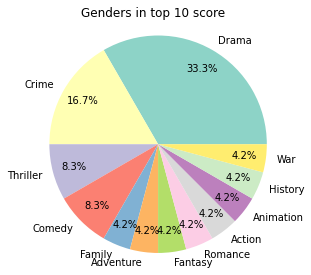

In [ ]:
from matplotlib import cm, rcParams
cmap = cm.get_cmap('Set3')

labels = [gen[7:] for gen in df_top_ten_gen.index]
df_top_ten_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                        cmap=cmap)
plt.ylabel(' ')
plt.suptitle('Genders in top 10 score');

In [ ]:
df_top_ten_pop = df_top_ten[genres_attr].sum().sort_values(ascending=False)
df_top_ten_gen = df_top_ten_gen[df_top_ten_gen> 0]
df_top_ten_gen

In [ ]:
df['revenue'] = df['revenue']/1e6 
df_top_rev = df.sort_values(by='revenue',
                            ascending=False)

In [ ]:
df['popularity'] = df['popularity'].astype(float) 
df_top_pop = df.sort_values(by='popularity',
                            ascending=False)

In [ ]:
df_top_pop[['original_title', 'score', 'popularity']].head(10)

,original_title,score,popularity
2020,Minions,6.385287,547.488298
469,Wonder Woman,7.158309,294.337037
1097,Beauty and the Beast,6.774673,287.253654
533,Baby Driver,7.104133,228.032744
90,Big Hero 6,7.749669,213.849907
263,Deadpool,7.378216,187.860492
163,Guardians of the Galaxy Vol. 2,7.542559,185.330992
443,Avatar,7.182347,185.070892
745,John Wick,6.968161,183.870374
58,Gone Girl,7.844593,154.801009


In [ ]:
df_top_rev[['original_title', 'score', 'popularity', 'revenue']].head(10)

,original_title,score,popularity,revenue
443,Avatar,7.182347,185.071,2787.965087
205,Star Wars: The Force Awakens,7.466804,31.626,2068.223624
207,Titanic,7.465873,26.8891,1845.034188
262,The Avengers,7.379210,89.8876,1519.557910
1745,Jurassic World,6.489987,32.7905,1513.528810
376,Furious 7,7.246968,27.2757,1506.249360
354,Avengers: Age of Ultron,7.266830,37.3794,1405.403694
57,Harry Potter and the Deathly Hallows: Part 2,7.845627,24.9907,1342.000000
366,Frozen,7.258167,24.2482,1274.219009
1097,Beauty and the Beast,6.774673,287.253654,1262.886337


In [ ]:
df_top_pop_gen = df_top_pop[genres_attr]
df_top_pop_gen = df_top_pop_gen[:10].sum().sort_values(ascending=False)
df_top_pop_gen = df_top_pop_gen[df_top_pop_gen > 0]
df_top_pop_gen

genres_Action             7.0
genres_Adventure          6.0
genres_Comedy             4.0
genres_Family             3.0
genres_Fantasy            3.0
genres_Thriller           2.0
genres_Science Fiction    2.0
genres_Animation          2.0
genres_Crime              1.0
genres_Mystery            1.0
genres_Drama              1.0
genres_Romance            1.0
dtype: float64

In [ ]:
df_top_rev_gen = df_top_rev[genres_attr]
df_top_rev_gen = df_top_rev_gen[:10].sum().sort_values(ascending=False)
df_top_rev_gen = df_top_rev_gen[df_top_rev_gen > 0]
df_top_rev_gen

genres_Adventure          7.0
genres_Action             6.0
genres_Science Fiction    5.0
genres_Fantasy            4.0
genres_Family             3.0
genres_Thriller           2.0
genres_Romance            2.0
genres_Drama              1.0
genres_Animation          1.0
dtype: float64

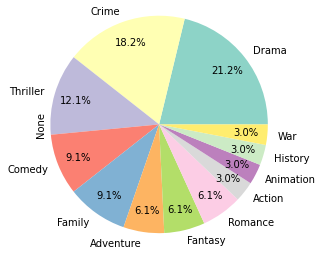

In [ ]:
df_top_pop_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                          cmap=cmap)

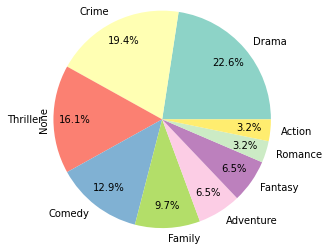

In [ ]:
df_top_rev_gen.plot.pie(autopct='%1.1f%%',
                          pctdistance=0.8,
                          radius=1.25,
                          labels=labels,
                          cmap=cmap)